In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob

# Extract data from MISR-estimated roughness files by using MTK library. Should use python3.6 for this purpose 

In [2]:
# # atm_day_time = "2016-04-29T11:30:28Z"
# atm_day_time = "2016-04-22T07:00:00Z"
# orbit_path = mtk.time_to_orbit_path(atm_day_time)
# orbit_path[1]

In [3]:
# mtk.latlon_to_bls(orbit_path[1], 275, 71.753154, 203.918)

## Plot ATM-MISR Transect 

In [4]:
# atm_file = "insample_atm_withPathOrbit_3cams_forTransect_oldCodeMethod_19apr.csv"
atm_file = "insample_atm_withPathOrbit_3cams_forTransect_mymethod_19apr.csv"
atm_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/training_data"

atm_data_fp = os.path.join(atm_dir, atm_file)

In [5]:
roughness_dir = "/media/ehsan/6T_part1/2016/april_2016/14528_apr2016/project_april_2016_3cam/roughness_predicted_from_PH"


In [6]:
transect_small = pd.read_csv(atm_data_fp)
transect_small

,Unnamed: 0,path,orbit,block,line,sample,lat,lon,Ca_r,Cf_r,An_r,rms,orbit_start,orbit_stop
0,1,106,86890,14,132.95,519.19,80.370866,272.809058,0.75534,1.07586,0.61394,9.24,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
1,2,106,86890,14,133.10,519.38,80.370774,272.805572,0.75652,1.07291,0.61511,9.29,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
2,3,106,86890,14,133.25,519.57,80.370682,272.802085,0.75652,1.07291,0.61511,8.65,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
3,4,106,86890,14,133.12,519.40,80.370763,272.805148,0.75652,1.07291,0.61511,8.99,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
4,5,106,86890,14,133.04,519.12,80.371141,272.808817,0.75652,1.07291,0.61511,8.15,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212925,212926,106,86890,14,51.99,616.74,80.059182,272.707337,-999994.00000,-999994.00000,-999994.00000,22.60,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
212926,212927,106,86890,14,51.89,616.74,80.059022,272.708521,-999994.00000,-999994.00000,-999994.00000,11.84,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
212927,212928,106,86890,14,51.93,616.61,80.059312,272.709248,-999994.00000,-999994.00000,-999994.00000,6.63,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00
212928,212929,106,86890,14,51.97,616.49,80.059602,272.709975,-999994.00000,-999994.00000,-999994.00000,10.79,2016-04-19 00:48:19+00:00,2016-04-19 02:27:12+00:00


In [7]:
transect_small = transect_small.iloc[0:100]
transect_small.iloc[0]

Unnamed: 0                             1
path                                 106
orbit                              86890
block                                 14
line                              132.95
sample                            519.19
lat                              80.3709
lon                              272.809
Ca_r                             0.75534
Cf_r                             1.07586
An_r                             0.61394
rms                                 9.24
orbit_start    2016-04-19 00:48:19+00:00
orbit_stop     2016-04-19 02:27:12+00:00
Name: 0, dtype: object

In [8]:
# # with my dataset
# # extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
# transect_from_misr_list = []

# for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
#     print("DF row: %s" %irow)
#     poll_bls = transect_small[['path','orbit','lat','lon','block','line','sample']].iloc[irow]
    
#     path_int = int(poll_bls[0])
#     orbit_int = int(poll_bls[1])
#     lat = poll_bls[2]
#     lon = poll_bls[3]
    
#     block_int = int(poll_bls[4])
#     line_int = int(poll_bls[5])
#     sample_int = int(poll_bls[6])
    
# #     print(block_int)
# #     print(line_int)
# #     print(sample_int)
    
# #     print("path: %s" %path_int)
# #     print("orbit: %s" %orbit_int)
# #     print("lat: %s" %lat)
# #     print("lon: %s" %lon)
    
    
#     # Q- now that we have found many paths, how figure out to select which path?
# #     bls = mtk.latlon_to_bls(path_int, 275 , lat, lon)
# #     print("MTK block-line-sample: (%s, %s, %s)" %bls)
    
#     # check block digits
#     if block_int < 10:
#         block_str = str(block_int).zfill(2)


#     # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
#     if path_int < 100:
#         print(path_int)
#         path_str = str(path_int).zfill(3)
#         print(path_str)
#     else:
#         path_str = str(path_int)
        
        
        
        
#     # find the pattern
#     roughness_file = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit_int)+"_B0"+block_str+".dat"
# #     print(roughness_filepattern)
    
#     rough_file_fp = os.path.join(roughness_dir, roughness_file)
# #     print(rough_file_fp)

#     # check if file is in storage
# #     print(os.path.isfile(rough_file_fp))
#     roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_file))
#     print("roughness file found: %d" %len(roughness_file_found_list))

#     if (len(roughness_file_found_list) > 1):
#         raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')

#     if (len(roughness_file_found_list) <= 0):
#         print("roughness file not found- continue to next path")
#         continue

#     # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
#     rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
# #     print(rough_2d_arr.shape)

# #     pixel_row = int(bls[1])
# #     pixel_col = int(bls[2])
    
#     roughness_per_pixel = rough_2d_arr[line_int, sample_int]
# #     print("%.3f" %roughness_per_pixel)
    
#     if roughness_per_pixel < 0:
#         continue
#     else:
#         transect_from_misr_list.append(roughness_per_pixel)


In [9]:
# with old method code
# extract MISR-estimated roughness for the same latLon locations and plot them together with ATM
transect_from_misr_list = []

for irow in range(transect_small.shape[0]): # each row==LatLon might fall in several blocks==POB, we open each block and will average all at the end
    
    print("DF row: %s" %irow)
#     poll_bls = transect_small[['#path',' orbit',' lat',' lon',' img_block',' line',' sample']].iloc[irow]
    poll_bls = transect_small[['path','orbit','lat','lon','block','line','sample']].iloc[irow]

    path_int = int(poll_bls[0])
    orbit_int = int(poll_bls[1])
    lat = poll_bls[2]
    lon = poll_bls[3]
    
    block_int = int(poll_bls[4])
    line_int = int(poll_bls[5])
    sample_int = int(poll_bls[6])
    
    print(block_int)
    print(line_int)
    print(sample_int)
    
    print("path: %s" %path_int)
    print("orbit: %s" %orbit_int)
    print("lat: %s" %lat)
    print("lon: %s" %lon)
    
    
    # Q- now that we have found many paths, how figure out to select which path?
#     bls = mtk.latlon_to_bls(path_int, 275 , lat, lon)
#     print("MTK block-line-sample: (%s, %s, %s)" %bls)
    
    # check block digits
    if block_int < 10:
        block_str = str(block_int).zfill(2)
    else:
        block_str = str(block_int)


    # use P and B to find roughness file, open it, and extract value for LS, append it to a list, and maybe finally append the list to DF as the last column
    if path_int < 100:
        print(path_int)
        path_str = str(path_int).zfill(3)
        print(path_str)
    else:
        path_str = str(path_int)
        
        
        
        
    # find the pattern
    roughness_file = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit_int)+"_B0"+block_str+".dat"
#     print(roughness_filepattern)
    
    rough_file_fp = os.path.join(roughness_dir, roughness_file)
#     print(rough_file_fp)

    # check if file is in storage
#     print(os.path.isfile(rough_file_fp))
    roughness_file_found_list = glob.glob(os.path.join(roughness_dir, roughness_file))
    print("roughness file found: %d" %len(roughness_file_found_list))

    if (len(roughness_file_found_list) > 1):
        raise ValueError('more than 1 file found, there is a problem with this code and it has to be reviewed.')

    if (len(roughness_file_found_list) <= 0):
        print("roughness file not found- continue to next path")
        continue

    # open roughness file and read pixel value- chat binary format to 2D array and read pixel value
    rough_2d_arr = np.fromfile(roughness_file_found_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)

#     pixel_row = int(bls[1])
#     pixel_col = int(bls[2])
    
    roughness_per_pixel = rough_2d_arr[line_int, sample_int]
#     print("%.3f" %roughness_per_pixel)
    
    if roughness_per_pixel < 0:
        continue
    else:
        transect_from_misr_list.append(roughness_per_pixel)


DF row: 0
14
132
519
path: 106
orbit: 86890
lat: 80.370866
lon: 272.809058
roughness file found: 1
DF row: 1
14
133
519
path: 106
orbit: 86890
lat: 80.370774
lon: 272.80557200000004
roughness file found: 1
DF row: 2
14
133
519
path: 106
orbit: 86890
lat: 80.37068199999999
lon: 272.80208500000003
roughness file found: 1
DF row: 3
14
133
519
path: 106
orbit: 86890
lat: 80.370763
lon: 272.805148
roughness file found: 1
DF row: 4
14
133
519
path: 106
orbit: 86890
lat: 80.37114100000002
lon: 272.808817
roughness file found: 1
DF row: 5
14
133
519
path: 106
orbit: 86890
lat: 80.371049
lon: 272.805326
roughness file found: 1
DF row: 6
14
133
519
path: 106
orbit: 86890
lat: 80.37095699999998
lon: 272.801836
roughness file found: 1
DF row: 7
14
133
519
path: 106
orbit: 86890
lat: 80.371038
lon: 272.804889
roughness file found: 1
DF row: 8
14
133
519
path: 106
orbit: 86890
lat: 80.371416
lon: 272.808564
roughness file found: 1
DF row: 9
14
133
519
path: 106
orbit: 86890
lat: 80.371324
lon: 272.8

DF row: 98
14
135
517
path: 106
orbit: 86890
lat: 80.377243
lon: 272.79499
roughness file found: 1
DF row: 99
14
135
517
path: 106
orbit: 86890
lat: 80.377346
lon: 272.798909
roughness file found: 1


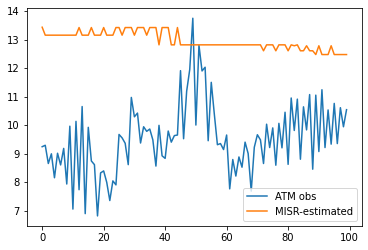

In [10]:
# plot transect
# transect_small["rms"].plot(x=transect_small.index)#, y=transect_small)
# plt.plot(transect_from_misr)

x = transect_small.index
plt.plot(x, transect_small["rms"])
plt.plot(x, transect_from_misr_list)
plt.legend(["ATM obs","MISR-estimated"])

In [11]:
transect_small.index

RangeIndex(start=0, stop=100, step=1)

## statistics

In [12]:
transect_small.describe()

,Unnamed: 0,path,orbit,block,line,sample,lat,lon,Ca_r,Cf_r,An_r,rms
count,100.000000,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,106.0,86890.0,14.0,134.175700,518.557800,80.374060,272.802216,0.756926,1.072776,0.618332,9.528200
std,29.011492,0.0,0.0,0.0,0.659783,0.512287,0.001984,0.003248,0.001425,0.001390,0.002559,1.231819
min,1.000000,106.0,86890.0,14.0,132.950000,517.570000,80.370682,272.794990,0.754750,1.068790,0.613940,6.810000
25%,25.750000,106.0,86890.0,14.0,133.622500,518.147500,80.372390,272.799922,0.756520,1.072910,0.616290,8.717500
50%,50.500000,106.0,86890.0,14.0,134.175000,518.555000,80.374061,272.802133,0.757110,1.072910,0.618060,9.400000
75%,75.250000,106.0,86890.0,14.0,134.727500,518.982500,80.375729,272.804549,0.757110,1.072910,0.621010,10.077500
max,100.000000,106.0,86890.0,14.0,135.420000,519.570000,80.377428,272.809058,0.760050,1.075860,0.621010,13.750000


## histogram

<AxesSubplot:>

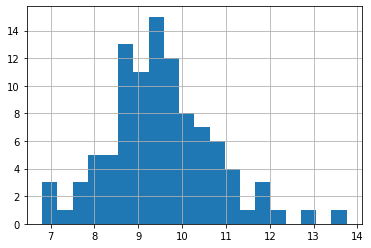

In [13]:
transect_small["rms"].hist(bins=20, alpha=1)